{'Graph': <networkx.classes.digraph.DiGraph object at 0x0000014C75515D90>, 'genesNb': 3, 'autoRG': 0.0, 'duoRG': 0.0, 'AdjMatrice': array([[0, 1, 0],
       [0, 0, 1],
       [0, 0, 0]]), 'meanClustering': 0.0, 'subGraph': {'0-1-2': 'Cascade'}}


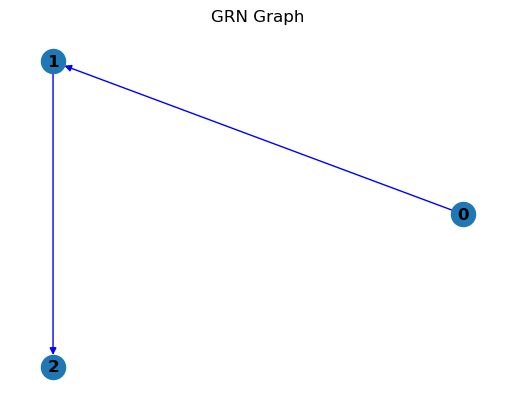

In [2]:
import ochunGRN as oGRN
import numpy as np
import matplotlib.pyplot as plt
AdjMatrice = np.array([[0, 1, 0],
                       [0, 0, 1],
                       [0, 0, 0]])
test = oGRN.GrnFromAdj(AdjMatrice)
print(test)
oGRN.plotGraph(test)

La mise en équation différentielle du graphe précédent est la suivante :
$$
\begin{align*}
&\left\{
    \begin{array}{ll}
        \frac{dG_0}{dt}=-k_0G_0 \\
        \frac{dG_1}{dt}=k_0G_0-k_1G_1 \\
        \frac{dG_2}{dt}=k_1G_1 \\
    \end{array}
\right. \\ 
&\text{with  }      
G_0(0)=1, G_1(0)=1, G_2(0)=1 \\
&k_0=3,k_1=2,k_2=1
\end{align*}
$$
Après résolution analytique on obtient :
$$
\begin{align*}
&\left\{
    \begin{array}{ll}
        G_0=e^{-3t} \\
        G_1=4e^{-2t}-3e^{-3t} \\
        G_2=-4e^{-2t}+2e^{-3t}+3 \\
    \end{array}
\right. 
\end{align*}
$$

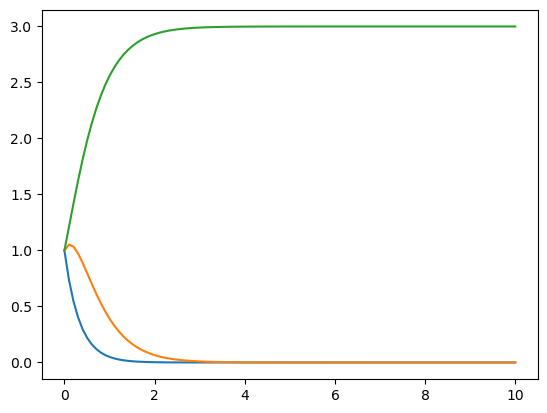

In [4]:
plt.figure()
T = np.linspace(0,10,100)
G0 = np.exp(-3*T)
G1 = 4*np.exp(-2*T)-3*np.exp(-3*T)
G2 = -4*np.exp(-2*T)+2*np.exp(-3*T)+3
plt.plot(T,G0)
plt.plot(T,G1)
plt.plot(T,G2)

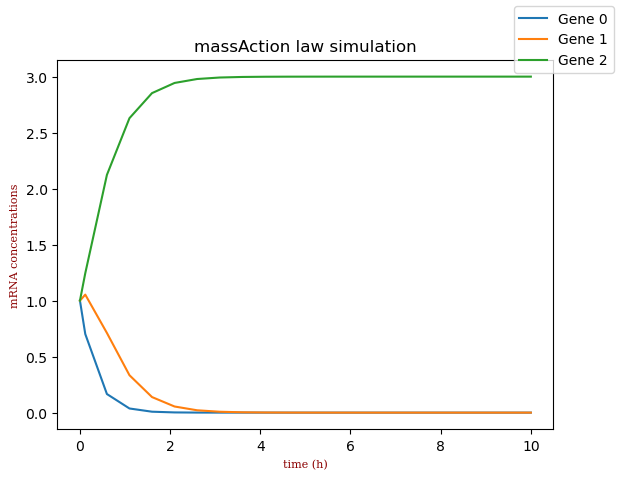

In [6]:
Coeff = {"G0":[100,0,0],"TranscriptionsRate":[3,2,1],"mRNAAvg":[1,1,1]}
oGRN.simulationODEs(test, ["massAction"], (0,10), Coeff, physicalNoiseAmplitude=0, stochasticNoiseAmplitude=0, dropOutRate=0)
oGRN.plotSim(test)